This notebook is for demonstrating the use of the DataGenerator when training a model.

In [9]:
from pandas import DataFrame
from tensorflow.python.keras.models import Model
from tensorflow.keras.callbacks import History
from ai_tools.displays import plot_history

import utils.constants as consts
from ai_tools import DataGenerator
from ai_tools.helpers import create_data_frame_from_path, split_stratified_into_train_val_test
from ai_tools.model_builders import build_conv2d_example

PATH_TO_DATASET: str = '../../datasets/serialized_dataset'
df: DataFrame = create_data_frame_from_path(PATH_TO_DATASET, number_of_samples_for_each_class=2_000)  # Total number of samples: 20,000

Data set is split up into train, validation, and test sets. An even distribution of the ontology is maintained with this split. What's returned is 3 pandas.DataFrames

In [12]:
df_train, df_val, df_test = split_stratified_into_train_val_test(df)  # type: DataFrame, DataFrame, DataFrame
print(df_train.instrument.value_counts())

piano     1200
guitar    1200
reed      1200
organ     1200
bass      1200
string    1200
vocal     1200
synth     1200
brass     1200
flute     1200
Name: instrument, dtype: int64


An simple CNN example is built.

In [4]:
model: Model = build_conv2d_example(input_shape=consts.X_SHAPE)
model.summary()

Model: "2d_convolution"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 44, 1)]      0         
_________________________________________________________________
batch_norm (LayerNormalizati (None, 300, 44, 1)        88        
_________________________________________________________________
conv2d_relu_1 (Conv2D)       (None, 300, 44, 128)      6400      
_________________________________________________________________
max_pool_2d_1 (MaxPooling2D) (None, 150, 22, 128)      0         
_________________________________________________________________
conv2d_relu_2 (Conv2D)       (None, 150, 22, 128)      409728    
_________________________________________________________________
max_pool_2d_2 (MaxPooling2D) (None, 75, 11, 128)       0         
_________________________________________________________________
conv2d_relu_3 (Conv2D)       (None, 75, 11, 64)     

The data generators are created with the dataframe splits created previously.

In [5]:
batch_size: int = 64
train_data_generator: DataGenerator = DataGenerator(df_train, batch_size=batch_size)
val_data_generator: DataGenerator = DataGenerator(df_val, batch_size=batch_size)

Train the model.

In [6]:
num_epochs: int = 50

history: History = model.fit(
    train_data_generator,
    steps_per_epoch=len(train_data_generator.get_data_frame.index) // batch_size,
    epochs=num_epochs,
    validation_data=val_data_generator,
    validation_steps=len(val_data_generator.get_data_frame.index) // batch_size,
    batch_size=batch_size
)

Epoch 1/50
187/187 [==============================] - 31s 150ms/step - loss: 2.2976 - accuracy: 0.1127 - val_loss: 2.2818 - val_accuracy: 0.1310
Epoch 2/50
187/187 [==============================] - 28s 150ms/step - loss: 2.2604 - accuracy: 0.1488 - val_loss: 2.2388 - val_accuracy: 0.1651
Epoch 3/50
187/187 [==============================] - 28s 151ms/step - loss: 2.2416 - accuracy: 0.1669 - val_loss: 2.2115 - val_accuracy: 0.1726
Epoch 4/50
187/187 [==============================] - 28s 150ms/step - loss: 2.2221 - accuracy: 0.1859 - val_loss: 2.1779 - val_accuracy: 0.2099
Epoch 5/50
187/187 [==============================] - 28s 150ms/step - loss: 2.1798 - accuracy: 0.2091 - val_loss: 2.1518 - val_accuracy: 0.2223
Epoch 6/50
187/187 [==============================] - 28s 150ms/step - loss: 2.1764 - accuracy: 0.2121 - val_loss: 2.1377 - val_accuracy: 0.2303
Epoch 7/50
187/187 [==============================] - 28s 150ms/step - loss: 2.1582 - accuracy: 0.2162 - val_loss: 2.1150 - val_ac

The model learning history metrics are plotted. The model doesn't reach a high accuracy, but beats baseline of 1/10. This demonstrates everything is working correctly with
the DataGenerator.

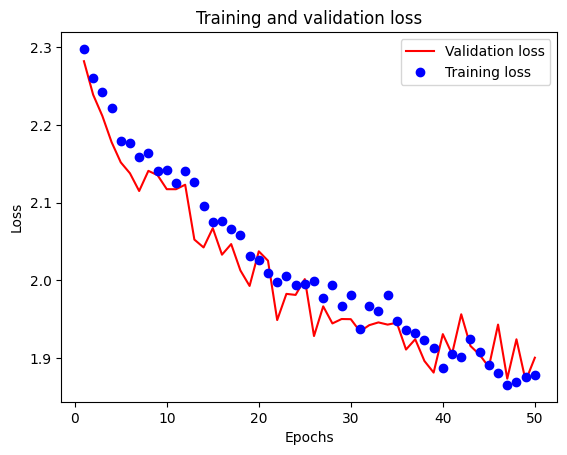

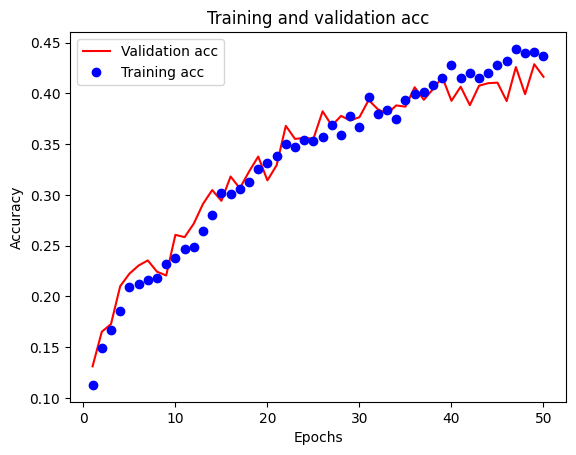

In [7]:
plot_history(history)

A DataGenerator is created for the test split and the model is evaluated. The accuracy seems appropriate given the validation array achieved during training.

In [8]:
test_data_generator: DataGenerator = DataGenerator(df_test, batch_size=batch_size)

model.evaluate(test_data_generator)

62/62 [==============================] - 3s 47ms/step - loss: 2.0695 - accuracy: 0.3395


[2.0695254802703857, 0.3394657373428345]